In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blackfridaytestdata/test.csv
/kaggle/input/blackfridaysalesprediction/train.csv


In [2]:
#Loading data from CSV file to pandas dataframe

data = pd.read_csv("../input/blackfridaysalesprediction/train.csv")

In [3]:
#Showing top 5 rows to see how data actually looks

data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#Description of the data

data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
#Inforamtion about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#Filling up null values with the mean of the values of the column

data['Product_Category_2'].fillna(9.842329, inplace=True)

In [7]:
#Filling up null values with the mean of the values of the column

data['Product_Category_3'].fillna(12.668243, inplace=True)

In [8]:
#No null values now

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
#Dropping both these columns as they are not useful for making model

newdata = data.drop(['User_ID','Product_ID'], axis = 1)

In [10]:
#Checking unique values 

newdata['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#Checking unique values 

newdata['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [12]:
#Checking unique values 

newdata['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
#Checking unique values 

newdata['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
import seaborn as sns

In [15]:
newdata.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [16]:
#Replacing values of columns to get all values of type int in our dataset

newdata["Gender"].replace({"F": 0, "M": 1}, inplace=True)
newdata["Age"].replace({'0-17':0, '55+':6, '26-35':2, '46-50':4, '51-55':5, '36-45':3, '18-25':1}, inplace=True)
newdata["Stay_In_Current_City_Years"].replace({'4+':4}, inplace=True)
newdata["City_Category"].replace({'A':1,'B':2,'C':3}, inplace=True)

In [17]:
newdata.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,1,2,0,3,9.842329,12.668243,8370
1,0,0,10,1,2,0,1,6.000000,14.000000,15200
2,0,0,10,1,2,0,12,9.842329,12.668243,1422
3,0,0,10,1,2,0,12,14.000000,12.668243,1057
4,1,6,16,3,4,0,8,9.842329,12.668243,7969


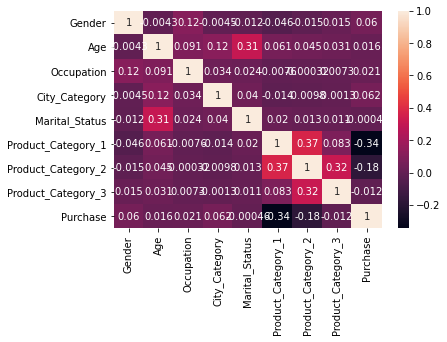

In [18]:
#Plotting heatmap of correlation of the data to get a better understanding of features that affects the most to the purchase behaviour of the customer

sns.heatmap(newdata.corr(),annot=True)

In [19]:
newdata.shape

(550068, 10)

In [20]:
#Output label of the data

Y = newdata['Purchase']

In [21]:
#Dropping columns which has very less or negative correlation with Purchase amount

finaldata = newdata.drop(['Product_Category_1','Product_Category_2','Product_Category_3','Purchase','Marital_Status','Age'], axis = 1)

In [22]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  int64 
 1   Occupation                  550068 non-null  int64 
 2   City_Category               550068 non-null  int64 
 3   Stay_In_Current_City_Years  550068 non-null  object
dtypes: int64(3), object(1)
memory usage: 16.8+ MB


In [23]:
finaldata["Stay_In_Current_City_Years"] = pd.to_numeric(finaldata["Stay_In_Current_City_Years"])

In [24]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Occupation                  550068 non-null  int64
 2   City_Category               550068 non-null  int64
 3   Stay_In_Current_City_Years  550068 non-null  int64
dtypes: int64(4)
memory usage: 16.8 MB


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(finaldata, Y, test_size=0.20)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440054 entries, 481069 to 340169
Data columns (total 4 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      440054 non-null  int64
 1   Occupation                  440054 non-null  int64
 2   City_Category               440054 non-null  int64
 3   Stay_In_Current_City_Years  440054 non-null  int64
dtypes: int64(4)
memory usage: 16.8 MB


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
#Using Linear Regression, training the regression model

reg = LinearRegression().fit(X_train, y_train)

In [30]:
#Making predictions on test data

predicted_output=reg.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_test/100, predicted_output/100)

2498.1562961930786